Volumetric wavelet Data Processing
==================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explores volumetric (3D) data processing.

In [1]:
from __future__ import division

import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt

from nt_toolbox.general import *
from nt_toolbox.signal import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

3D Volumetric Datasets
----------------------


We load a volumetric data.

In [2]:
from nt_toolbox.read_bin import *
M = read_bin("nt_toolbox/data/vessels.bin", ndims=3)

In [3]:
M = rescale(M)

Size of the image (here it is a cube).

In [4]:
n = np.shape(M)[1]

We can display some horizontal slices.

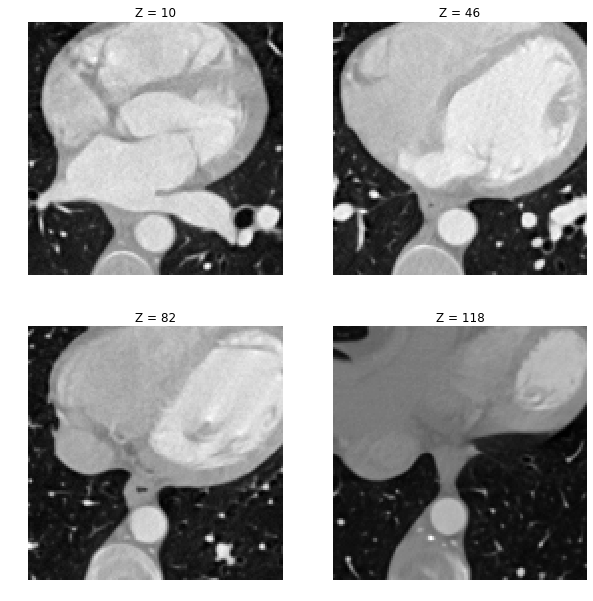

In [5]:
slices = np.round(np.linspace(10, n-10, 4))
plt.figure(figsize = (10,10))

for i in range(len(slices)):
    s = slices[i]
    imageplot(M[:,:,s], "Z = %i" %s, [2,2,i+1])

We can display an isosurface of the dataset (here we sub-sample to speed
up the computation).

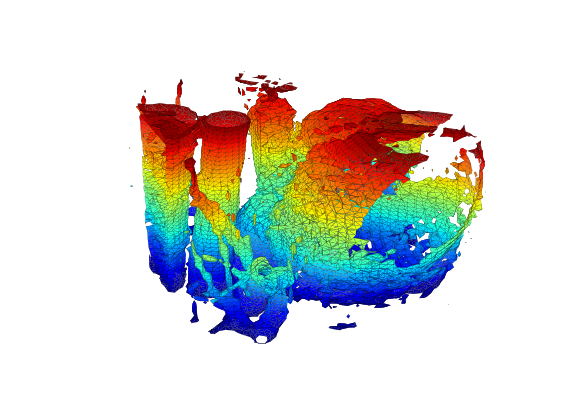

In [6]:
from nt_toolbox.isosurface import *
isosurface(M,.5,3)

3D Haar Transform
-----------------
An isotropic 3D Haar transform recursively extracts details wavelet
coefficients by performing local averages/differences along the X/Y/Z axis.


We apply a step of Haar transform in the X/Y/Z direction

Initialize the transform

In [7]:
MW = np.copy(M)

Average/difference along X

In [8]:
MW = np.concatenate(((MW[0:n:2,:,:] + MW[1:n:2,:,:])/np.sqrt(2), (MW[0:n:2,:,:] - MW[1:n:2,:,:])/np.sqrt(2)),0)

Average/difference along Y

In [9]:
MW = np.concatenate(((MW[:,0:n:2,:] + MW[:,1:n:2,:])/np.sqrt(2), (MW[:,0:n:2,:] - MW[:,1:n:2,:])/np.sqrt(2)),1)

Average/difference along Z

In [10]:
MW = np.concatenate(((MW[:,:,0:n:2] + MW[:,:,1:n:2])/np.sqrt(2), (MW[:,:,0:n:2] - MW[:,:,1:n:2])/np.sqrt(2)),2)

Display a horizontal and vertical slice to see the structure of the coefficients.

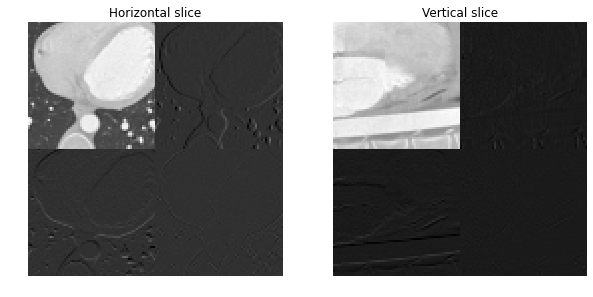

In [11]:
plt.figure(figsize=(10,5))
imageplot(MW[:,:,30], "Horizontal slice", [1,2,1])
imageplot((MW[:,30,:]), "Vertical slice", [1,2,2])

__Exercise 1__

Implement the forward wavelet transform by iteratively applying these
transform steps to the low pass residual.

In [12]:
run -i nt_solutions/multidim_2_volumetric/exo1

In [13]:
## Insert your code here.

Volumetric Data Haar Approximation
----------------------------------
An approximation is obtained by keeping only the largest coefficients.


We threshold the coefficients to perform $m$-term approximation.

number of kept coefficients

In [14]:
from nt_toolbox.perform_thresholding import *

m = round(.01*n**3)
MWT = perform_thresholding(MW, m, type="largest")

__Exercise 2__

Implement the backward transform to compute an approximation $M_1$ from
the coefficients MWT.

In [15]:
run -i nt_solutions/multidim_2_volumetric/exo2

In [16]:
## Insert your code here.

Display the approximation as slices.

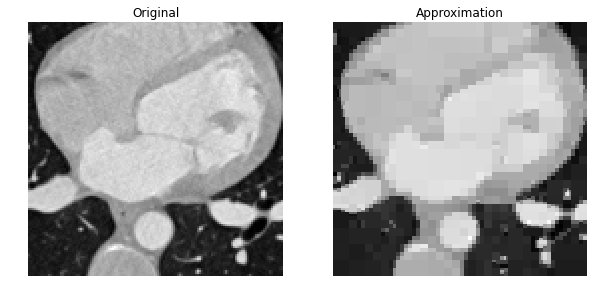

In [17]:
s = 30

plt.figure(figsize=(10,5))
imageplot(M[:, :,s], 'Original', [1,2,1])
imageplot(clamp(M1[:,:,s]), 'Approximation', [1,2,2])

Display the approximated isosurface.

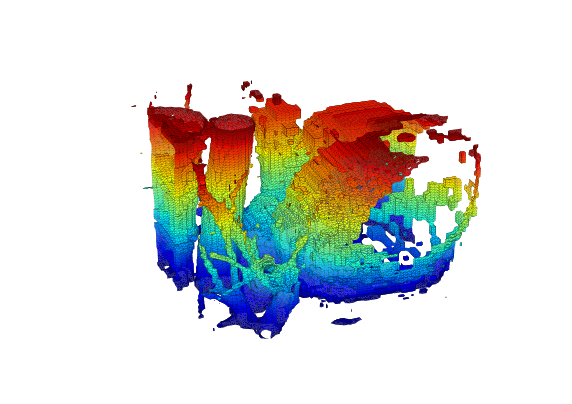

In [18]:
isosurface(M1,.5,2)

Linear Volumetric Denoising 
----------------------------
Linear denoising is obtained by low pass filtering.


We add a Gaussian noise to the image.

In [19]:
from numpy import random

sigma = .06
Mnoisy = M + sigma*random.randn(n, n, n)

Display slices of the noisy data.

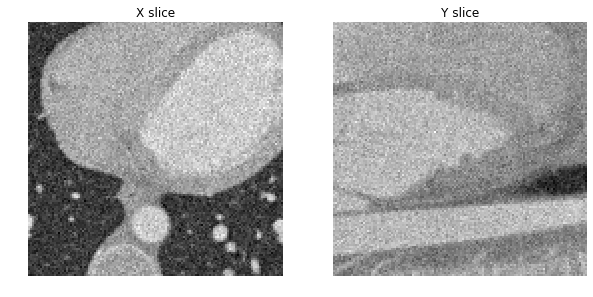

In [20]:
plt.figure(figsize=(10,5))
imageplot(Mnoisy[:,:,n//2],"X slice",[1,2,1])
imageplot(Mnoisy[:,n//2,:],"Y slice",[1,2,2])

A simple denoising method performs a linear filtering of the data.


We build a Gaussian filter of width $\sigma$.

Construct a 3D grid

In [21]:
x = np.arange(-n//2,n//2)
[X, Y, Z] = np.meshgrid(x, x, x)

Gaussian filter

In [22]:
s = 2 #width
h = np.exp(-(X**2 + Y**2 + Z**2)/(2*s**2))
h = h/np.sum(h)

The filtering is computed over the Fourier domain.

In [23]:
Mh = np.real(pyl.ifft2(pyl.fft2(Mnoisy,axes=(0,1,2)) * pyl.fft2(pyl.fftshift(h,axes= (0,1,2)),axes=(0,1,2)),axes= (0,1,2)))

Display denoised slices.

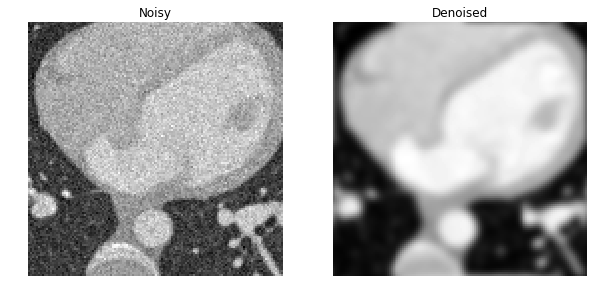

In [24]:
i = 40
plt.figure(figsize=(10,5))
imageplot(Mnoisy[:,:,i], "Noisy", [1,2,1])
imageplot(Mh[:,:,i], "Denoised", [1,2,2])

Display denoised iso-surface.

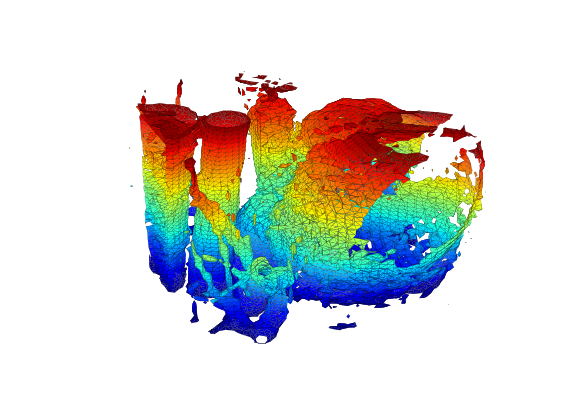

In [25]:
isosurface(M,.5,3)

__Exercise 3__

Select the optimal blurring width $s$ to reach the smallest possible
SNR. Keep the optimal denoising Mblur.

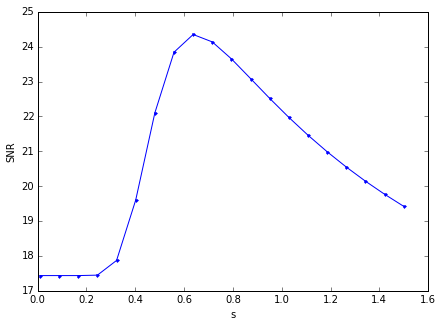

In [26]:
run -i nt_solutions/multidim_2_volumetric/exo3

In [27]:
## Insert your code here.

Display optimally denoised iso-surface.

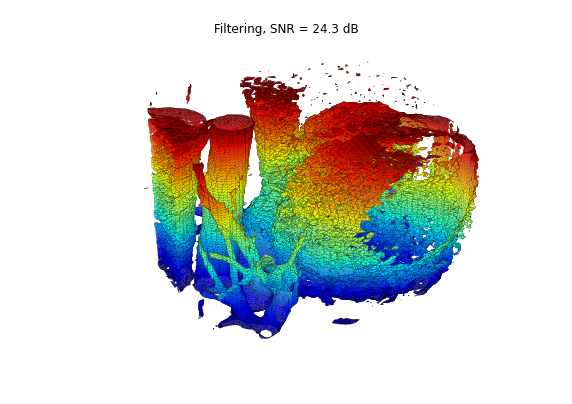

In [28]:
isosurface(Mblur,.5,2,"Filtering, SNR = %.1f dB" %snr(M, Mblur))

Non-Linear Wavelet Volumetric Denoising 
----------------------------------------
Denoising is obtained by removing small amplitude coefficients that
corresponds to noise.

__Exercise 4__

Perforn Wavelet denoising by thresholding the wavelet coefficients of
Mnoisy. Test both hard thresholding and soft thresholding to determine
the optimal threshold and the corresponding SNR.
Record the optimal result Mwav.

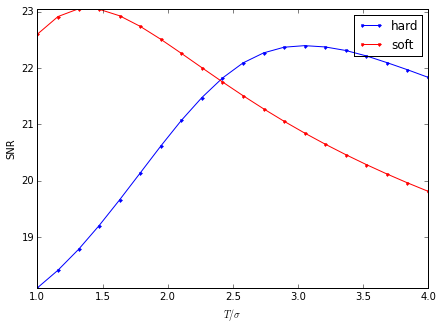

In [29]:
run -i nt_solutions/multidim_2_volumetric/exo4

In [30]:
## Insert your code here.

Display denoised iso-surface with optimal soft thresholding.

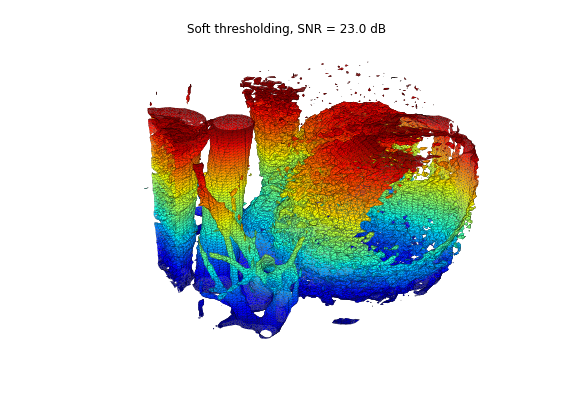

In [31]:
isosurface(Mblur,.5,2,"Soft thresholding, SNR = %.1f dB" %snr(M, Mwav))

Orthogonal wavelet thresholdings suffers from blocking artifacts.
This can be aleviated by performing a cycle spinning denoising, which
averages the denosing result of translated version of the signal.


A typical cycle spinning process is like this.

Maximum translation.

In [32]:
w = 4

List of translations.

In [33]:
[dZ, dX, dY] = np.meshgrid(np.arange(0,w),np.arange(0,w),np.arange(0,w))
dX = np.ravel(dX)
dY = np.ravel(dY)
dZ = np.ravel(dZ)

Initialize spinning process.

In [34]:
Mspin = np.zeros([n,n,n])

Spin.

In [ ]:
def circshift(x,v):
    x = np.roll(x,v[0], axis = 0)
    x = np.roll(x,v[1], axis = 1)
    x = np.roll(x,v[2], axis = 2)
    return x

for i in range(w**3):
    # shift the image
    MnoisyC = circshift(Mnoisy, [dX[i],dY[i],dZ[i]])
    # denoise the image to get a result M1
    M1 = MnoisyC; # replace this line by some denoising
    # shift inverse
    M1 = circshift(M1, [-dX[i],-dY[i],-dZ[i]])
    # average the result
    Mspin = Mspin*(i)/(i+1) + M1/(i+1)

__Exercise 5__

Implement cycle spinning hard thresholding with $T=3\sigma$.

In [ ]:
run -i nt_solutions/multidim_2_volumetric/exo5

In [ ]:
## Insert your code here.

Display denoised iso-surface.

In [ ]:
isosurface(Mspin,.5,2,"Cycle spinning, SNR = %.1f dB" %snr(M, Mspin))